In [146]:
import pandas as pd
import numpy as np
import pytz
import plotly 
import geopy

In [147]:
orders_raw= pd.read_csv('ISyE 6202 2022 Caseworks 3.1 and 3.2 Orders.csv')
meta = pd.read_excel('ISyE 6202 2022 Caseworks 3.1 and 3.2 MetaData.xlsx')

xls = pd.ExcelFile('ISyE 6202 2022 Caseworks 3.1 and 3.2 MetaData.xlsx')
category = pd.read_excel(xls, 'Product Categorization')
dim = pd.read_excel(xls, 'Modular Package Dimensions')
sp_lead_times = pd.read_excel(xls, 'Supply Lead Times')
dilv_tim_com = pd.read_excel(xls, 'Delivery Time Commitment')

zips = pd.read_csv('ISyE 6202 2022 Caseworks 3.1 and 3.2 ZIP3 US.csv')

#zip_state= pd.read_csv('uszips.csv')

In [148]:
# specify dtype of each column
names = list(orders_raw.columns)
dtypes = ["datetime64[ns]",int,str,str,int,str,int]
orders_raw = orders_raw.astype(dict(zip(names,dtypes)))
orders_raw

,Order_Date,Product,product category,sub-category,ZIP_3d,Country,Quantity
0,2019-01-01,1,A,f,70,US,61
1,2019-01-01,1,A,f,70,US,84
2,2019-01-01,1,A,f,115,US,56
3,2019-01-01,1,A,f,191,US,65
4,2019-01-01,1,A,f,272,US,84
...,...,...,...,...,...,...,...
713568,2019-12-31,771,Y,s,322,US,70
713569,2019-12-31,771,Y,s,841,US,63
713570,2019-12-31,771,Y,s,852,US,59
713571,2019-12-31,777,Y,s,490,US,58


In [149]:
states_2_letter = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [150]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

# Task 1

## a

In [151]:
orders=orders_raw.copy()
orders['ZIP_str'] = [str(x).zfill(3) + '00' for x in orders['ZIP_3d']]
zips['ZIP_3d'] = zips['ZIP3']
zips.drop(axis = 1, columns = ['ZIP3'])
orders = pd.merge(orders, zips, on='ZIP_3d')
orders

,Order_Date,Product,product category,sub-category,ZIP_3d,Country,Quantity,ZIP_str,ZIP3,Lat,Lon
0,2019-01-01,1,A,f,70,US,61,07000,70,40.667400,-74.114600
1,2019-01-01,1,A,f,70,US,84,07000,70,40.667400,-74.114600
2,2019-01-01,7,A,f,70,US,83,07000,70,40.667400,-74.114600
3,2019-01-01,8,A,f,70,US,56,07000,70,40.667400,-74.114600
4,2019-01-01,255,H,f,70,US,68,07000,70,40.667400,-74.114600
...,...,...,...,...,...,...,...,...,...,...,...
713568,2019-10-07,258,H,f,772,US,126,77200,772,29.799679,-95.457756
713569,2019-12-05,255,H,f,772,US,81,77200,772,29.799679,-95.457756
713570,2019-09-03,251,H,f,204,US,67,20400,204,38.897589,-77.028096
713571,2019-11-10,370,L,m,59,US,66,05900,59,44.726674,-71.663170


In [152]:
# coordinates globally
glob = orders.groupby(['Lat', 'Lon'])['Quantity'].sum()
glob = pd.DataFrame(data = glob).reset_index()
glob

,Lat,Lon,Quantity
0,20.666774,-157.292398,73437
1,21.316271,-157.858771,34652
2,25.771400,-80.206350,1692
3,25.787712,-80.241397,464854
4,25.957772,-80.258590,334839
...,...,...,...
884,55.847715,-132.703055,2037
885,58.188334,-135.227811,3872
886,60.524385,-153.405946,11541
887,60.970213,-151.140110,22453


In [153]:
# coordinates by product categroy
product_cate = orders.groupby(['Lat', 'Lon','product category'])['Quantity'].sum()
product_cate = pd.DataFrame(data = product_cate).reset_index()
product_cate

,Lat,Lon,product category,Quantity
0,20.666774,-157.292398,A,3137
1,20.666774,-157.292398,B,82
2,20.666774,-157.292398,C,429
3,20.666774,-157.292398,D,9414
4,20.666774,-157.292398,F,145
...,...,...,...,...
15094,65.359648,-151.894015,Q,577
15095,65.359648,-151.894015,R,867
15096,65.359648,-151.894015,S,622
15097,65.359648,-151.894015,U,698


In [154]:
prdct_by_cat_dict={}
iter_cat = product_cate['product category'].unique()
for cat in iter_cat:
    prdct_by_cat_dict[cat] = product_cate[product_cate['product category']==cat]
prdct_by_cat_dict['A']

,Lat,Lon,product category,Quantity
0,20.666774,-157.292398,A,3137
20,21.316271,-157.858771,A,1424
40,25.771400,-80.206350,A,81
48,25.787712,-80.241397,A,27048
72,25.957772,-80.258590,A,21620
...,...,...,...,...
15034,55.847715,-132.703055,A,122
15043,58.188334,-135.227811,A,350
15055,60.524385,-153.405946,A,1009
15071,60.970213,-151.140110,A,1636


In [155]:
"""glob1 = orders.groupby('ZIP_str')['Quantity'].sum()
glob1 = pd.DataFrame(data = glob1).reset_index()
glob1['zip'] = [int(x) for x in glob1['ZIP_str']]"""

"glob1 = orders.groupby('ZIP_str')['Quantity'].sum()\nglob1 = pd.DataFrame(data = glob1).reset_index()\nglob1['zip'] = [int(x) for x in glob1['ZIP_str']]"

### State-Heatmap

In [105]:
!pip install geopy
!pip install plotly-express

from geopy.geocoders import Nominatim
import plotly.express as px

geolocator = Nominatim(user_agent="geoapiExercises")

In [212]:
# Get state col based on the coordinate
def get_state(df):
    state = []
    df = pd.DataFrame(data = df).reset_index()
    for i in range(len(df)):
        location = geolocator.reverse((df['Lat'][i], df['Lon'][i]))
        if location != None:
            state.append(location.raw['address']['state'])
        else:
            state.append(None)
    df['state']=state
    df['state_code']= df['state'].map(us_state_to_abbrev)

In [216]:
# Plot State Heatmap function
def state_heatmap(df):
    df_state=df.groupby(['state_code','state'])['Quantity'].sum()
    df_state = pd.DataFrame(data = df_state).reset_index()
    fig = px.choropleth(df_state,
                        locations='state_code', 
                        locationmode="USA-states", 
                        scope="usa",
                        color='Quantity',
                        color_continuous_scale="amp", 
                        #animation_frame='Order_Date'
                        )
    fig.show()

#### Globally

In [51]:
get_state(glob)

In [108]:
state_heatmap(glob)

#### Product Category

In [ ]:
# category from A-X: prdct_by_cat_dict['i'] for i from A-X
prdct_by_cat_dict['A']=pd.DataFrame(data = prdct_by_cat_dict['A']).reset_index()
get_state(prdct_by_cat_dict['A'])

In [ ]:
state_heatmap(prdct_by_cat_dict['A'])

### Zip-Heatmap

In [97]:
!pip install U folium
import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap

In [98]:
def zip_heatmap(df):
    # min max grid
    min_lat = df['Lat'].min()
    max_lat = df['Lat'].max()
    min_long = df['Lon'].min()
    max_long = df['Lon'].max()
    
    # enforce grid
    df = df[df.Lat >= min_lat]
    df = df[df.Lat <= max_lat]
    df = df[df.Lon >= min_long]
    df = df[df.Lon <= max_long]

    # define centre of map
    Heat_COORDINATES = (df['Lat'].mean(), df['Lon'].mean())

    # subset to match subset of locations
    MAX_RECORDS = 100

    # create empty map zoomed
    map_zip = folium.Map(location=Heat_COORDINATES, zoom_start=5)

    # define heat map
    HeatMap(data=df[['Lat', 'Lon', 'Quantity']].groupby(['Lat', 'Lon']).sum().reset_index().values.tolist(), radius=12, max_zoom=5).add_to(map_zip)

    display(map_zip)

#### Globally

In [99]:
# demand share of each three-digit zip code
zip_heatmap(glob)

#### Product Category

In [101]:
# category from A-X
zip_heatmap(prdct_by_cat_dict["G"])

## b

In [203]:
import matplotlib.pyplot as plt
import datetime

In [204]:
#daily demand globally
daily_demand_total=orders_raw.groupby(['Order_Date'])['Quantity'].sum()
daily_demand_total=pd.DataFrame(data = daily_demand_total).reset_index()

Index(['Order_Date', 'Quantity'], dtype='object')

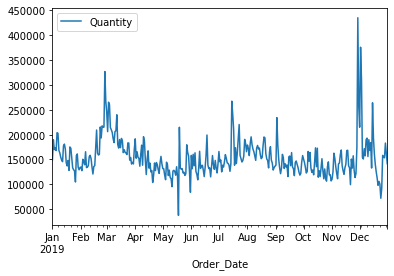

In [205]:
daily_demand_plot= daily_demand_total.plot.line(x='Order_Date', y='Quantity')

In [208]:
# Getting week value
daily_demand_total['Week']= daily_demand_total['Order_Date'].dt.isocalendar().week
daily_demand_total

,Order_Date,Quantity,Week
0,2019-01-01,149461,1
1,2019-01-02,189554,1
2,2019-01-03,169647,1
3,2019-01-04,173496,1
4,2019-01-05,167778,1
...,...,...,...
360,2019-12-27,154330,52
361,2019-12-28,153169,52
362,2019-12-29,182898,52
363,2019-12-30,162732,1


In [ ]:
weekly_demand_total=daily_demand_total.groupby(['Week'])['Quantity'].sum()
weekly_demand_total=pd.DataFrame(data = weekly_demand_total).reset_index()
weekly_demand_total.head(5)

In [ ]:
import plotly.express as px

def lineplot(df):
    fig = px.line(df, x="Order_Date", 
                  y = df.iloc[:, 5:].columns,
                  title='Line Plot')

    fig.update_xaxes(
        rangeslider_visible=True,
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="week", step="week", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        )
    )
    type(fig)
    return fig


def agg_lineplot(df, kwd1, kwd2):
    fig = px.line(df, x="date", 
                  y=df.columns[
                      df.columns.str.contains(kwd1)  &
                      df.columns.str.contains(kwd2)
                  ],
                  title='Aggregated Line Plot')

    fig.update_xaxes(
        rangeslider_visible=True,
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        )
    )
    type(fig)
    return fig


def agg_lineplot_3features(df, kwd1, kwd2, kwd3):
    fig = px.line(df, x="date", 
                  y=df.columns[
                      df.columns.str.contains(kwd1)  &
                      df.columns.str.contains(kwd2)  &
                      df.columns.str.contains(kwd3)
                  ],
                  title='Aggregated Line Plot')

    fig.update_xaxes(
        rangeslider_visible=True,
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        )
    )
    type(fig)
    return fig

def agg_lineplot_4features(df, kwd1, kwd2, kwd3, kwd4):
    fig = px.line(df, x="date", 
                  y=df.columns[
                      df.columns.str.contains(kwd1)  &
                      df.columns.str.contains(kwd2)  &
                      df.columns.str.contains(kwd3)  &
                      df.columns.str.contains(kwd4)
                  ],
                  title='Aggregated Line Plot')

    fig.update_xaxes(
        rangeslider_visible=True,
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        )
    )
    type(fig)
    return fig

# c

# Task 2